In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns
from scipy.signal import resample
from scipy.ndimage import gaussian_filter1d
import preprocessing

In [2]:
preprocessed_data = loadmat('./temp/preprocessed_data.mat')
spike_train = preprocessed_data['spike_train'][0][:]
stimulus_idxs = preprocessed_data['stimulus_idxs'][0][:]

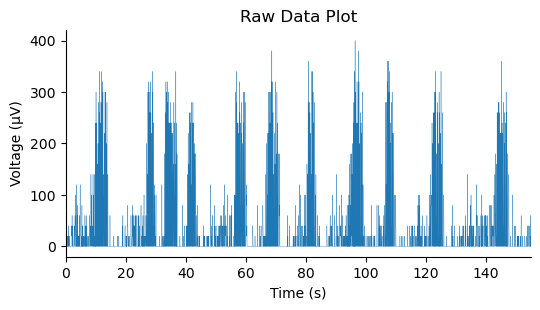

In [3]:
sampling_frequency = 25000
sampling_time = 1 / sampling_frequency

resampling_frequency = 1000
resampling_time = 1 / resampling_frequency

frequency_ratio = sampling_frequency / resampling_frequency

bin_duration = 0.05

IFR, bin_samples = preprocessing.get_IFR(spike_train, bin_duration, sampling_time)
ns.visualization.plot_raw_data(IFR, sampling_time=sampling_time)

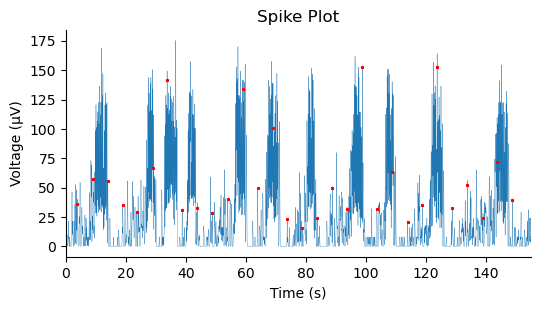

In [4]:
filtered_IFR = gaussian_filter1d(IFR, 0.95 * bin_samples)

resampled_IFR = resample(filtered_IFR, int(np.floor(np.size(spike_train, axis=0) / frequency_ratio)))
resampled_stimulus_idxs = np.round(stimulus_idxs / frequency_ratio).astype(np.int_)
ns.visualization.plot_spikes(resampled_IFR, resampled_stimulus_idxs, sampling_time=resampling_time)

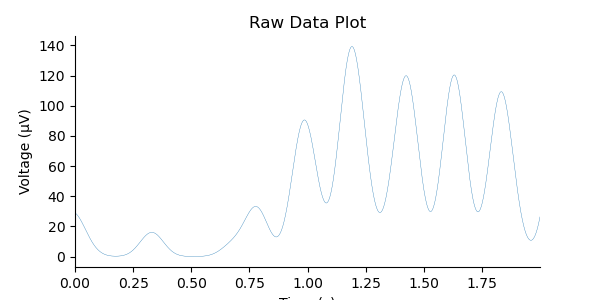

In [21]:
trials = preprocessing.shape_trials(resampled_IFR, resampled_stimulus_idxs, trial_duration=2, sampling_time=resampling_time)

ns.visualization.plot_raw_data(trials[23], sampling_time=resampling_time)

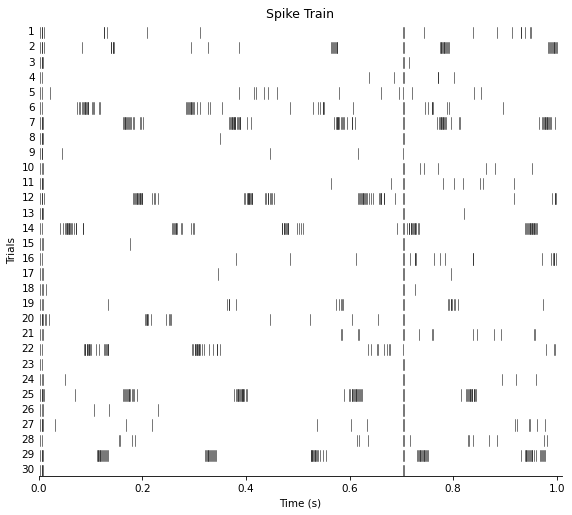

In [16]:
spike_train_trials = preprocessing.shape_trials(spike_train, stimulus_idxs, trial_duration=1, sampling_time=sampling_time)
# spike_train_trials = spike_train_trials[np.arange(0, 10)]
spikes_idxs = []
for idx in np.arange(np.size(spike_train_trials, 0)):
    spikes_idxs.append(ns.utils.convert_spike_train_to_spikes_idxs(spike_train_trials[idx]))

ns.visualization.plot_spike_train(spikes_idxs, sampling_time=sampling_time, figsize=(9, 8), dpi=75, ylabel='Trials', reverse=True)